<a href="https://www.kaggle.com/sanjayanbu/fake-news-classification?scriptVersionId=89106366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

### Reading the input file

In [2]:
train_data = pd.read_csv("../input/fake-news/train.csv")

## Preprocessing the data

In [3]:
# Initializing respective classes
lemmatizer = WordNetLemmatizer()
cv = CountVectorizer(ngram_range=(1, 3), max_features=5000)

In [4]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

In [5]:
# Checking null values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# Removing null values
train_data.dropna(inplace=True)

In [7]:
# Resetting index
train_data.reset_index(inplace=True)

## Text preprocessing
* Transform to lower case
* Tokenization
* Remove stopwords
* Lemmatization

In [8]:
def transform_data(data):
    data['t_title'] = data['title'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(re.sub("[^a-zA-Z]", " ", x)) if word not in stopwords.words("english")]))
    return data

In [9]:
train_data = transform_data(train_data)

In [10]:
X = list(train_data['t_title'].values)
y = train_data['label']

## Train test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
train_input = cv.fit_transform(x_train).toarray()
train_input = tf_idf_vectorizer.fit_transform(x_train).toarray()
transformed_df = pd.DataFrame(data=train_input, columns=cv.get_feature_names())

## Naive Bayes

In [13]:
classifier = MultinomialNB()
cv_model = GridSearchCV(classifier, {}, cv=3)
cv_model.fit(train_input, y_train)
best_model = cv_model.best_estimator_
# test_data = cv.transform(x_test)
test_data = tf_idf_vectorizer.transform(x_test)
y_pred = best_model.predict(test_data.toarray())

## Model Evaluation

In [14]:
accuracy_score(y_test, y_pred) * 100

89.48231862923805

<AxesSubplot:>

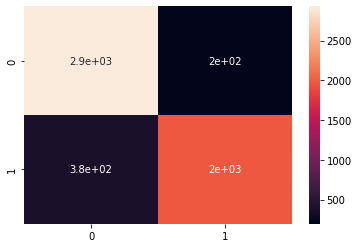

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Predicting the test data

In [16]:
test_df = pd.read_csv("../input/fake-news/test.csv")
test_df.fillna(method='pad', inplace=True)

In [17]:
test_df = transform_data(test_df)

In [18]:
X = list(test_df['t_title'].values)
x_test = cv.transform(X)

In [19]:
y_pred = best_model.predict(x_test)

## Submitting Test Dataframe

In [20]:
submission_df = pd.DataFrame({"id": test_df["id"],"label": y_pred})

In [21]:
submission_df.to_csv("submission.csv", index=False)

In [22]:
submission_df.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,0
